<a href="https://colab.research.google.com/github/nandishmadhu/Kaggle_Google_Brain/blob/validation_branch/GB_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import os
import pandas as pd


In [3]:
#drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls '/content/drive/MyDrive/Kaggle_Google_Brain/Data/'

sample_submission.csv  test.csv  train.csv


In [5]:
train=pd.read_csv('/content/drive/MyDrive/Kaggle_Google_Brain/Data/train.csv')

In [6]:
test=pd.read_csv('/content/drive/MyDrive/Kaggle_Google_Brain/Data/test.csv')

In [7]:
train

id  breath_id   R   C  time_step       u_in  u_out   pressure
0              1          1  20  50   0.000000   0.083334      0   5.837492
1              2          1  20  50   0.033652  18.383041      0   5.907794
2              3          1  20  50   0.067514  22.509278      0   7.876254
3              4          1  20  50   0.101542  22.808822      0  11.742872
4              5          1  20  50   0.135756  25.355850      0  12.234987
...          ...        ...  ..  ..        ...        ...    ...        ...
6035995  6035996     125749  50  10   2.504603   1.489714      1   3.869032
6035996  6035997     125749  50  10   2.537961   1.488497      1   3.869032
6035997  6035998     125749  50  10   2.571408   1.558978      1   3.798729
6035998  6035999     125749  50  10   2.604744   1.272663      1   4.079938
6035999  6036000     125749  50  10   2.638017   1.482739      1   3.869032

[6036000 rows x 8 columns]

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
import plotly.express as px

sns.set_style("darkgrid")

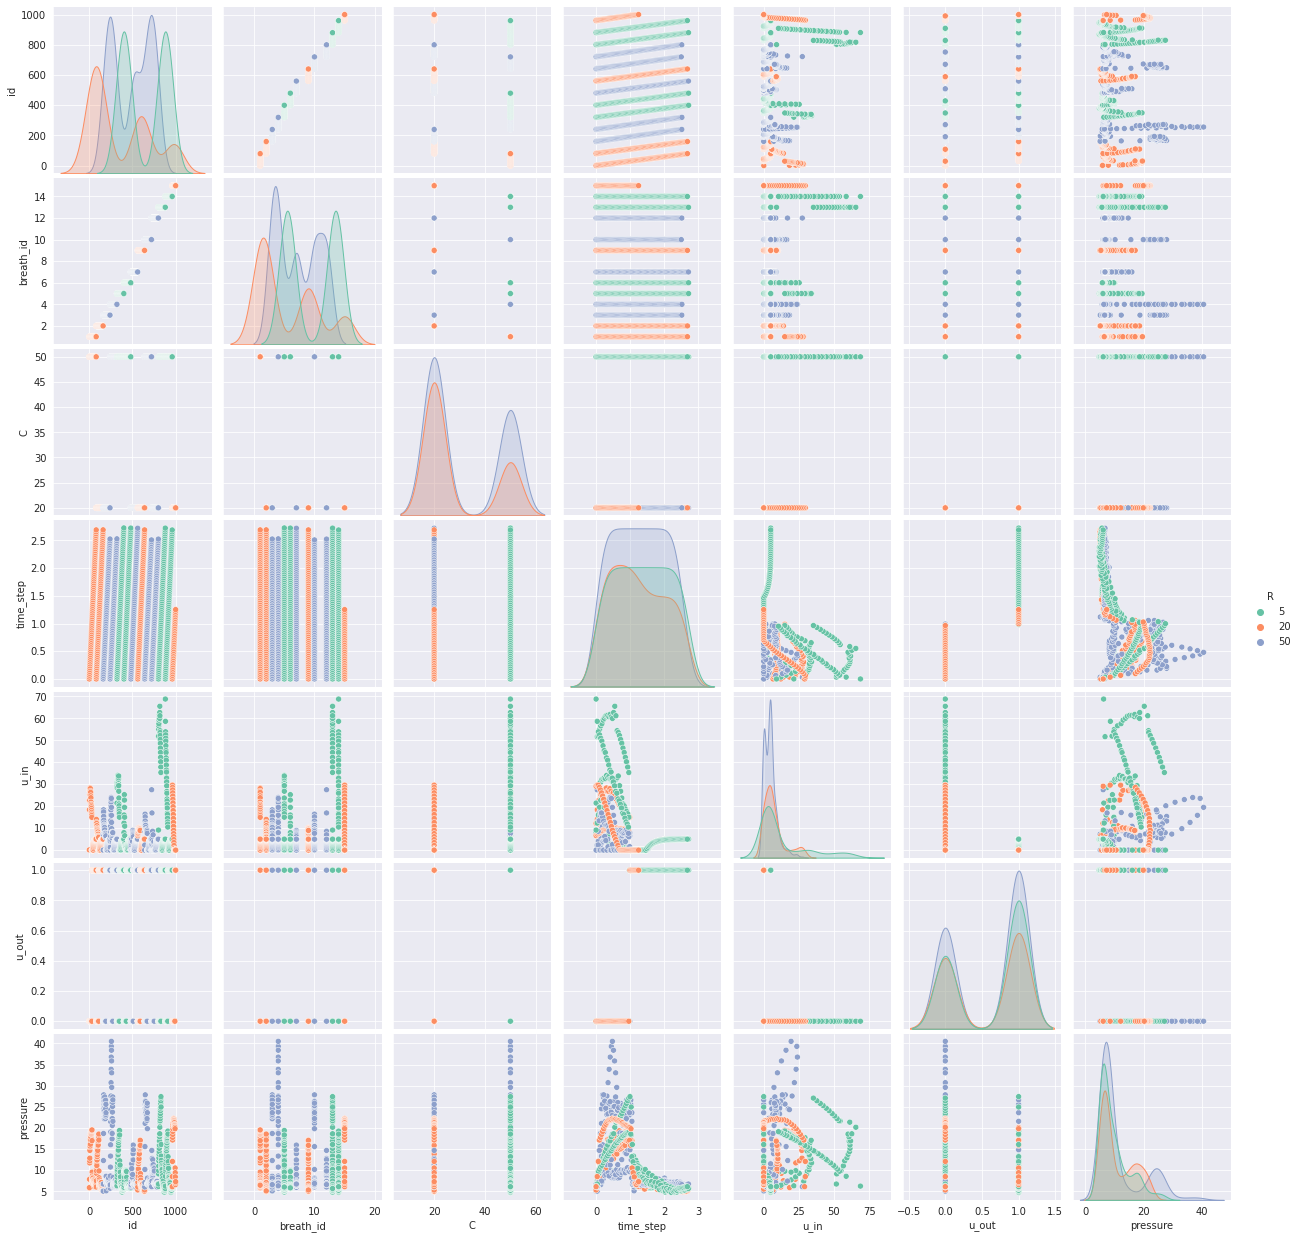

In [9]:

graph_R = sns.pairplot(train.head(1000), hue="R", palette="Set2", diag_kind="kde", height=2.5)

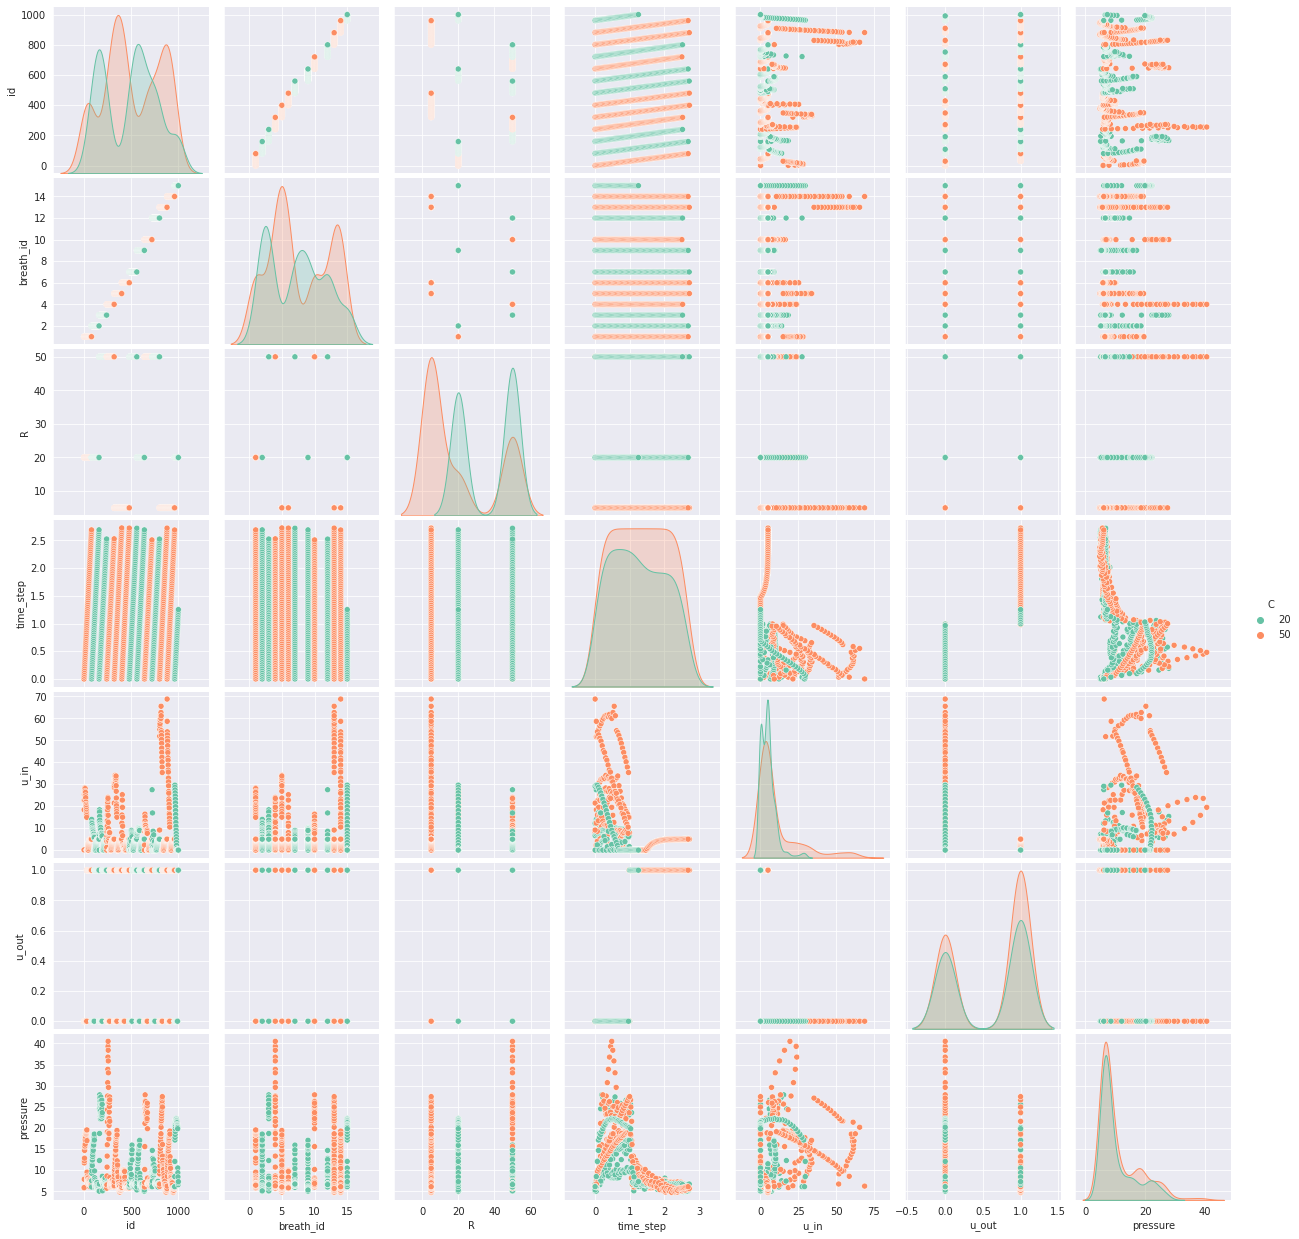

In [10]:
graph_C = sns.pairplot(train.head(1000), hue="C", palette="Set2", diag_kind="kde", height=2.5)

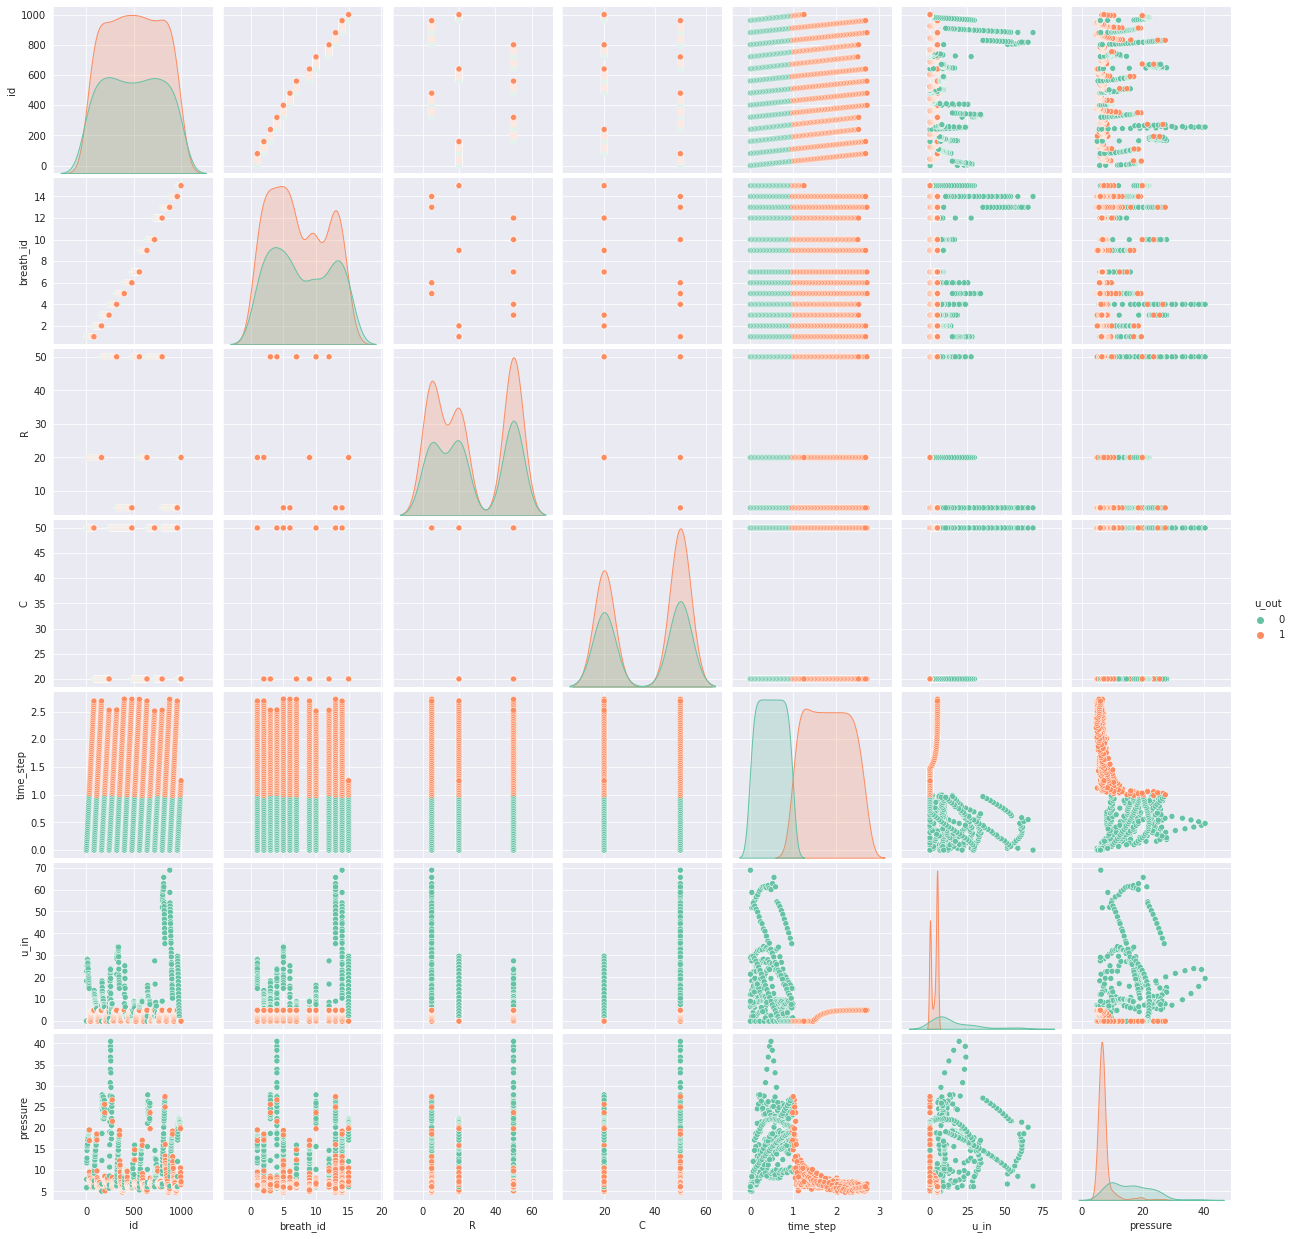

In [11]:
graph_u_out = sns.pairplot(train.head(1000), hue="u_out", palette="Set2", diag_kind="kde", height=2.5)

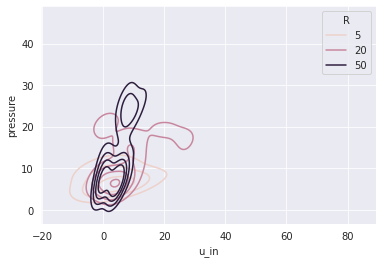

In [12]:
sns.kdeplot(
    data=train.head(1000), x="u_in", y="pressure", hue="R",
    levels=5, thresh=.2,
)

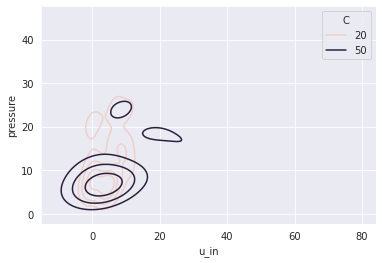

In [13]:
sns.kdeplot(
    data=train.head(1000), x="u_in", y="pressure", hue="C",
    levels=5, thresh=.2,
)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning:

No contour levels were found within the data range.



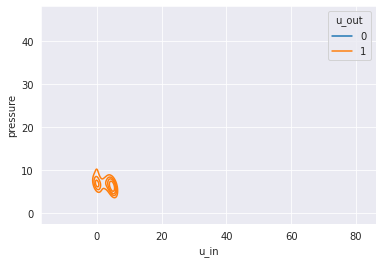

In [14]:
sns.kdeplot(
    data=train.head(1000), x="u_in", y="pressure", hue="u_out",
    levels=5, thresh=.2,
)

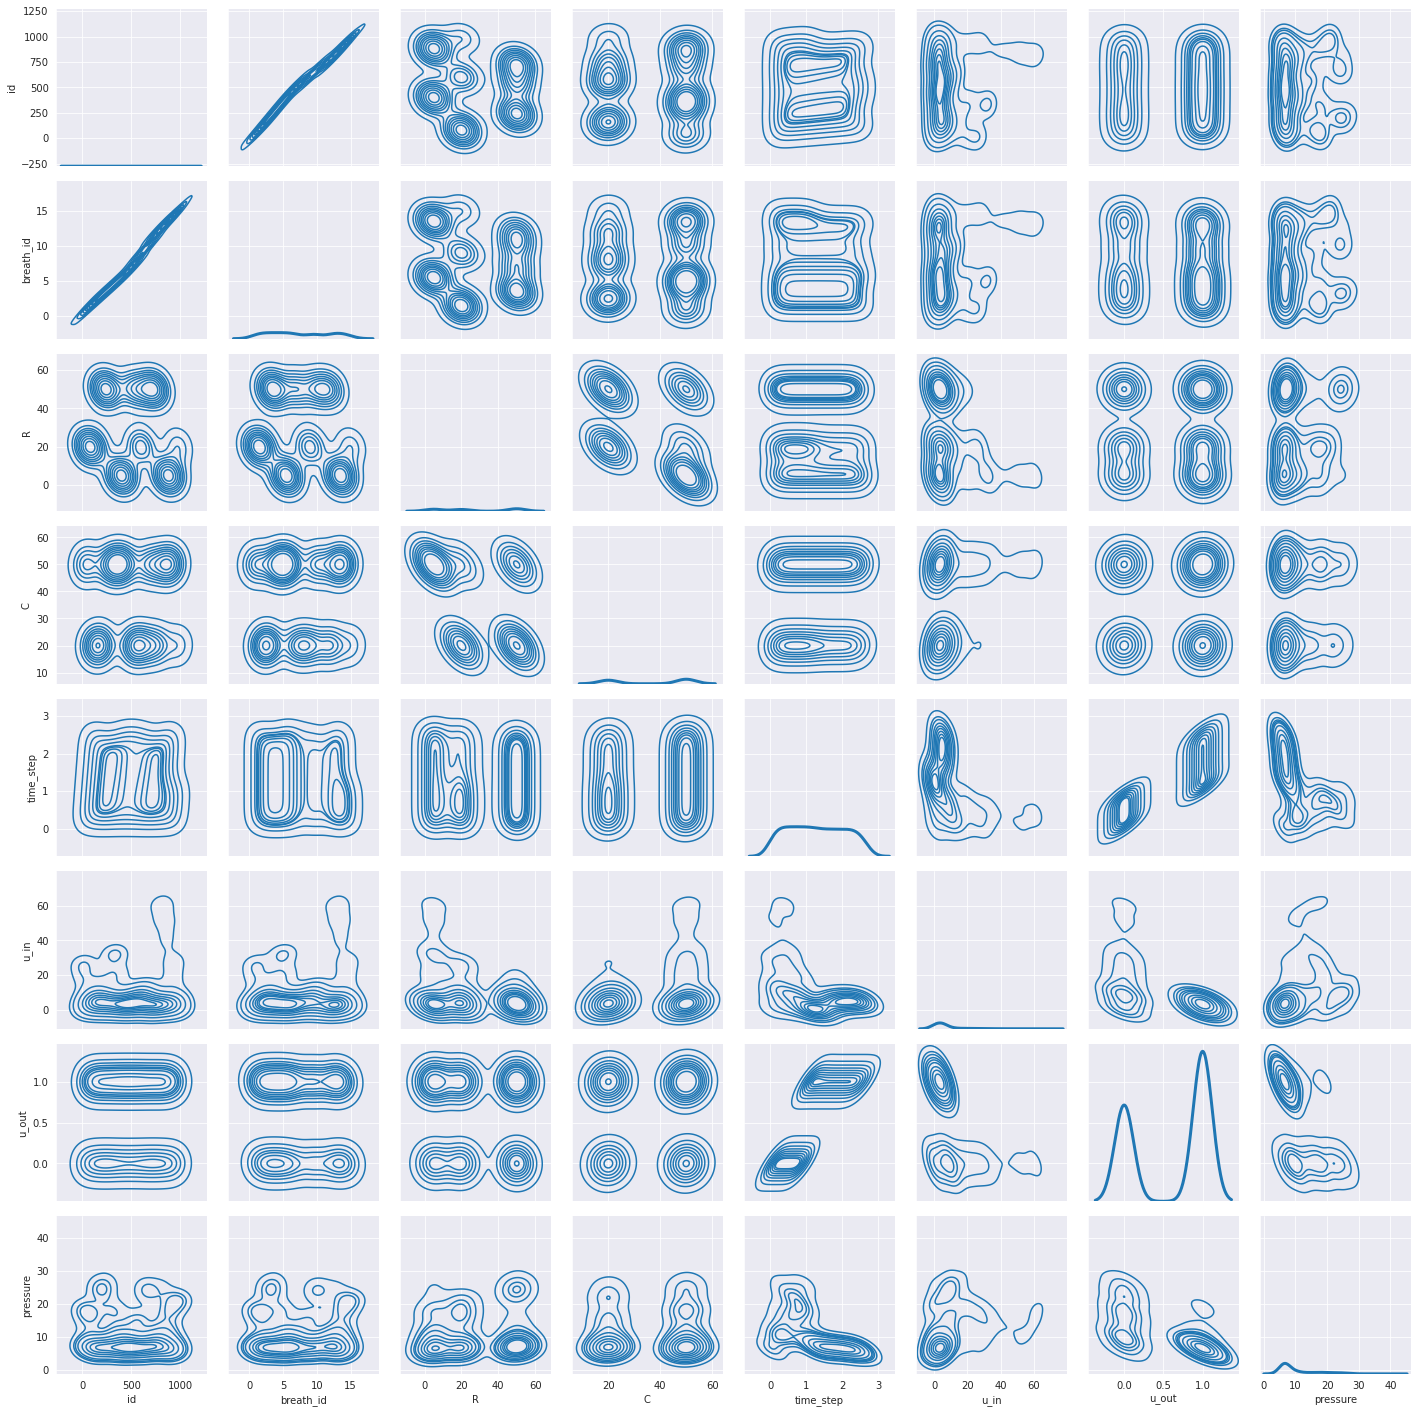

In [15]:
g=sns.PairGrid(train.head(1000))
g.map_upper(sns.kdeplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=True)

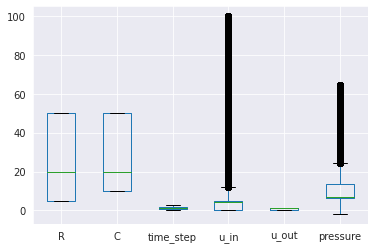

In [16]:
train_box=train.drop(['id','breath_id'],axis=1)
train_box.boxplot()

In [17]:
train_box.describe()

R             C  ...         u_out      pressure
count  6.036000e+06  6.036000e+06  ...  6.036000e+06  6.036000e+06
mean   2.703618e+01  2.608072e+01  ...  6.204493e-01  1.122041e+01
std    1.959549e+01  1.715231e+01  ...  4.852752e-01  8.109703e+00
min    5.000000e+00  1.000000e+01  ...  0.000000e+00 -1.895744e+00
25%    5.000000e+00  1.000000e+01  ...  0.000000e+00  6.329607e+00
50%    2.000000e+01  2.000000e+01  ...  1.000000e+00  7.032628e+00
75%    5.000000e+01  5.000000e+01  ...  1.000000e+00  1.364103e+01
max    5.000000e+01  5.000000e+01  ...  1.000000e+00  6.482099e+01

[8 rows x 6 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bf75bb290>,
      dtype=object)

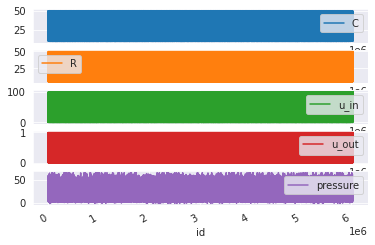

In [18]:
train.set_index('id')[['C', 'R', 'u_in', 'u_out', 'pressure']].plot(subplots=True)

In [ ]:
###### Feature Engineering ########

In [72]:
#Given Train and Test Data are as below
train

id  breath_id   R   C  time_step       u_in  u_out   pressure
0              1          1  20  50   0.000000   0.083334      0   5.837492
1              2          1  20  50   0.033652  18.383041      0   5.907794
2              3          1  20  50   0.067514  22.509278      0   7.876254
3              4          1  20  50   0.101542  22.808822      0  11.742872
4              5          1  20  50   0.135756  25.355850      0  12.234987
...          ...        ...  ..  ..        ...        ...    ...        ...
6035995  6035996     125749  50  10   2.504603   1.489714      1   3.869032
6035996  6035997     125749  50  10   2.537961   1.488497      1   3.869032
6035997  6035998     125749  50  10   2.571408   1.558978      1   3.798729
6035998  6035999     125749  50  10   2.604744   1.272663      1   4.079938
6035999  6036000     125749  50  10   2.638017   1.482739      1   3.869032

[6036000 rows x 8 columns]

In [73]:
test

id  breath_id   R   C  time_step       u_in  u_out
0              1          0   5  20   0.000000   0.000000      0
1              2          0   5  20   0.031904   7.515046      0
2              3          0   5  20   0.063827  14.651675      0
3              4          0   5  20   0.095751  21.230610      0
4              5          0   5  20   0.127644  26.320956      0
...          ...        ...  ..  ..        ...        ...    ...
4023995  4023996     125748  20  10   2.530117   4.971245      1
4023996  4023997     125748  20  10   2.563853   4.975709      1
4023997  4023998     125748  20  10   2.597475   4.979468      1
4023998  4023999     125748  20  10   2.631134   4.982648      1
4023999  4024000     125748  20  10   2.665301   4.985373      1

[4024000 rows x 7 columns]

In [ ]:
# FEATURE ENGINEERING

In [ ]:
#Creating a copy of the train and test dataframe 

In [77]:
train_updated=train.copy()
train_updated

id  breath_id   R   C  time_step       u_in  u_out   pressure
0              1          1  20  50   0.000000   0.083334      0   5.837492
1              2          1  20  50   0.033652  18.383041      0   5.907794
2              3          1  20  50   0.067514  22.509278      0   7.876254
3              4          1  20  50   0.101542  22.808822      0  11.742872
4              5          1  20  50   0.135756  25.355850      0  12.234987
...          ...        ...  ..  ..        ...        ...    ...        ...
6035995  6035996     125749  50  10   2.504603   1.489714      1   3.869032
6035996  6035997     125749  50  10   2.537961   1.488497      1   3.869032
6035997  6035998     125749  50  10   2.571408   1.558978      1   3.798729
6035998  6035999     125749  50  10   2.604744   1.272663      1   4.079938
6035999  6036000     125749  50  10   2.638017   1.482739      1   3.869032

[6036000 rows x 8 columns]

id  breath_id   R   C  time_step       u_in  u_out   pressure
0              1          1  20  50   0.000000   0.083334      0   5.837492
1              2          1  20  50   0.033652  18.383041      0   5.907794
2              3          1  20  50   0.067514  22.509278      0   7.876254
3              4          1  20  50   0.101542  22.808822      0  11.742872
4              5          1  20  50   0.135756  25.355850      0  12.234987
...          ...        ...  ..  ..        ...        ...    ...        ...
6035995  6035996     125749  50  10   2.504603   1.489714      1   3.869032
6035996  6035997     125749  50  10   2.537961   1.488497      1   3.869032
6035997  6035998     125749  50  10   2.571408   1.558978      1   3.798729
6035998  6035999     125749  50  10   2.604744   1.272663      1   4.079938
6035999  6036000     125749  50  10   2.638017   1.482739      1   3.869032

[6036000 rows x 8 columns]

In [76]:
test_updated=test.copy()
test_updated

id  breath_id   R   C  time_step       u_in  u_out
0              1          0   5  20   0.000000   0.000000      0
1              2          0   5  20   0.031904   7.515046      0
2              3          0   5  20   0.063827  14.651675      0
3              4          0   5  20   0.095751  21.230610      0
4              5          0   5  20   0.127644  26.320956      0
...          ...        ...  ..  ..        ...        ...    ...
4023995  4023996     125748  20  10   2.530117   4.971245      1
4023996  4023997     125748  20  10   2.563853   4.975709      1
4023997  4023998     125748  20  10   2.597475   4.979468      1
4023998  4023999     125748  20  10   2.631134   4.982648      1
4023999  4024000     125748  20  10   2.665301   4.985373      1

[4024000 rows x 7 columns]

In [78]:
#Adding new features as below 

train_updated['time_delta']=0.00000000000000000000   # Actual delta time between the timesteps is being captured as a feature 
train_updated['pressure_delta']=0.00000000000000000000 # Actual delta in pressure between timesteps is being captured as a feature
train_updated['breath_number']=0 #Each breath_id has 80 timesteps, capturing the value of the actual breath number (0 to 79) for each breath_id

test_updated['time_delta']=0.00000000000000000000   # Actual delta time between the timesteps is being captured as a feature 
test_updated['breath_number']=0 #Each breath_id has 80 timesteps, capturing the value of the actual breath number (0 to 79) for each breath_id


In [79]:
for x in range(len(train_updated['id'])):
  mod=x%80
  train_updated['breath_number'][x]=mod
  if mod ==0:
    train_updated['time_delta'][x]=0
    train_updated['pressure_delta'][x]=0
  else:
    train_updated['time_delta'][x]=(train_updated['time_step'][x]-train_updated['time_step'][x-1])
    train_updated['pressure_delta'][x]=(train_updated['pressure'][x]-train_updated['pressure'][x-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying t

In [82]:
for x in range(len(test_updated['id'])):
  mod=x%80
  test_updated['breath_number'][x]=mod
  if mod ==0:
    test_updated['time_delta'][x]=0
  else:
    test_updated['time_delta'][x]=(test_updated['time_step'][x]-test_updated['time_step'][x-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
train_updated.tail(100)

id  breath_id   R  ...  time_delta  pressure_delta  breath_number
6035900  6035901     125745  50  ...    0.031712        0.070302             60
6035901  6035902     125745  50  ...    0.031663        0.703021             61
6035902  6035903     125745  50  ...    0.031698       -0.492115             62
6035903  6035904     125745  50  ...    0.031777        0.000000             63
6035904  6035905     125745  50  ...    0.031790       -0.913928             64
...          ...        ...  ..  ...         ...             ...            ...
6035995  6035996     125749  50  ...    0.033412       -0.070302             75
6035996  6035997     125749  50  ...    0.033358        0.000000             76
6035997  6035998     125749  50  ...    0.033447       -0.070302             77
6035998  6035999     125749  50  ...    0.033337        0.281209             78
6035999  6036000     125749  50  ...    0.033273       -0.210906             79

[100 rows x 11 columns]

In [86]:
test_updated.head(100)

id  breath_id  R   C  ...       u_in  u_out  time_delta  breath_number
0     1          0  5  20  ...   0.000000      0    0.000000              0
1     2          0  5  20  ...   7.515046      0    0.031904              1
2     3          0  5  20  ...  14.651675      0    0.031924              2
3     4          0  5  20  ...  21.230610      0    0.031924              3
4     5          0  5  20  ...  26.320956      0    0.031893              4
..  ...        ... ..  ..  ...        ...    ...         ...            ...
95   96          8  5  50  ...   1.432375      0    0.034002             15
96   97          8  5  50  ...   7.638344      0    0.034052             16
97   98          8  5  50  ...   0.027579      0    0.033989             17
98   99          8  5  50  ...   6.226726      0    0.033998             18
99  100          8  5  50  ...   1.435060      0    0.034166             19

[100 rows x 9 columns]

In [ ]:
#Reviewing the patterns through visuals after adding new features

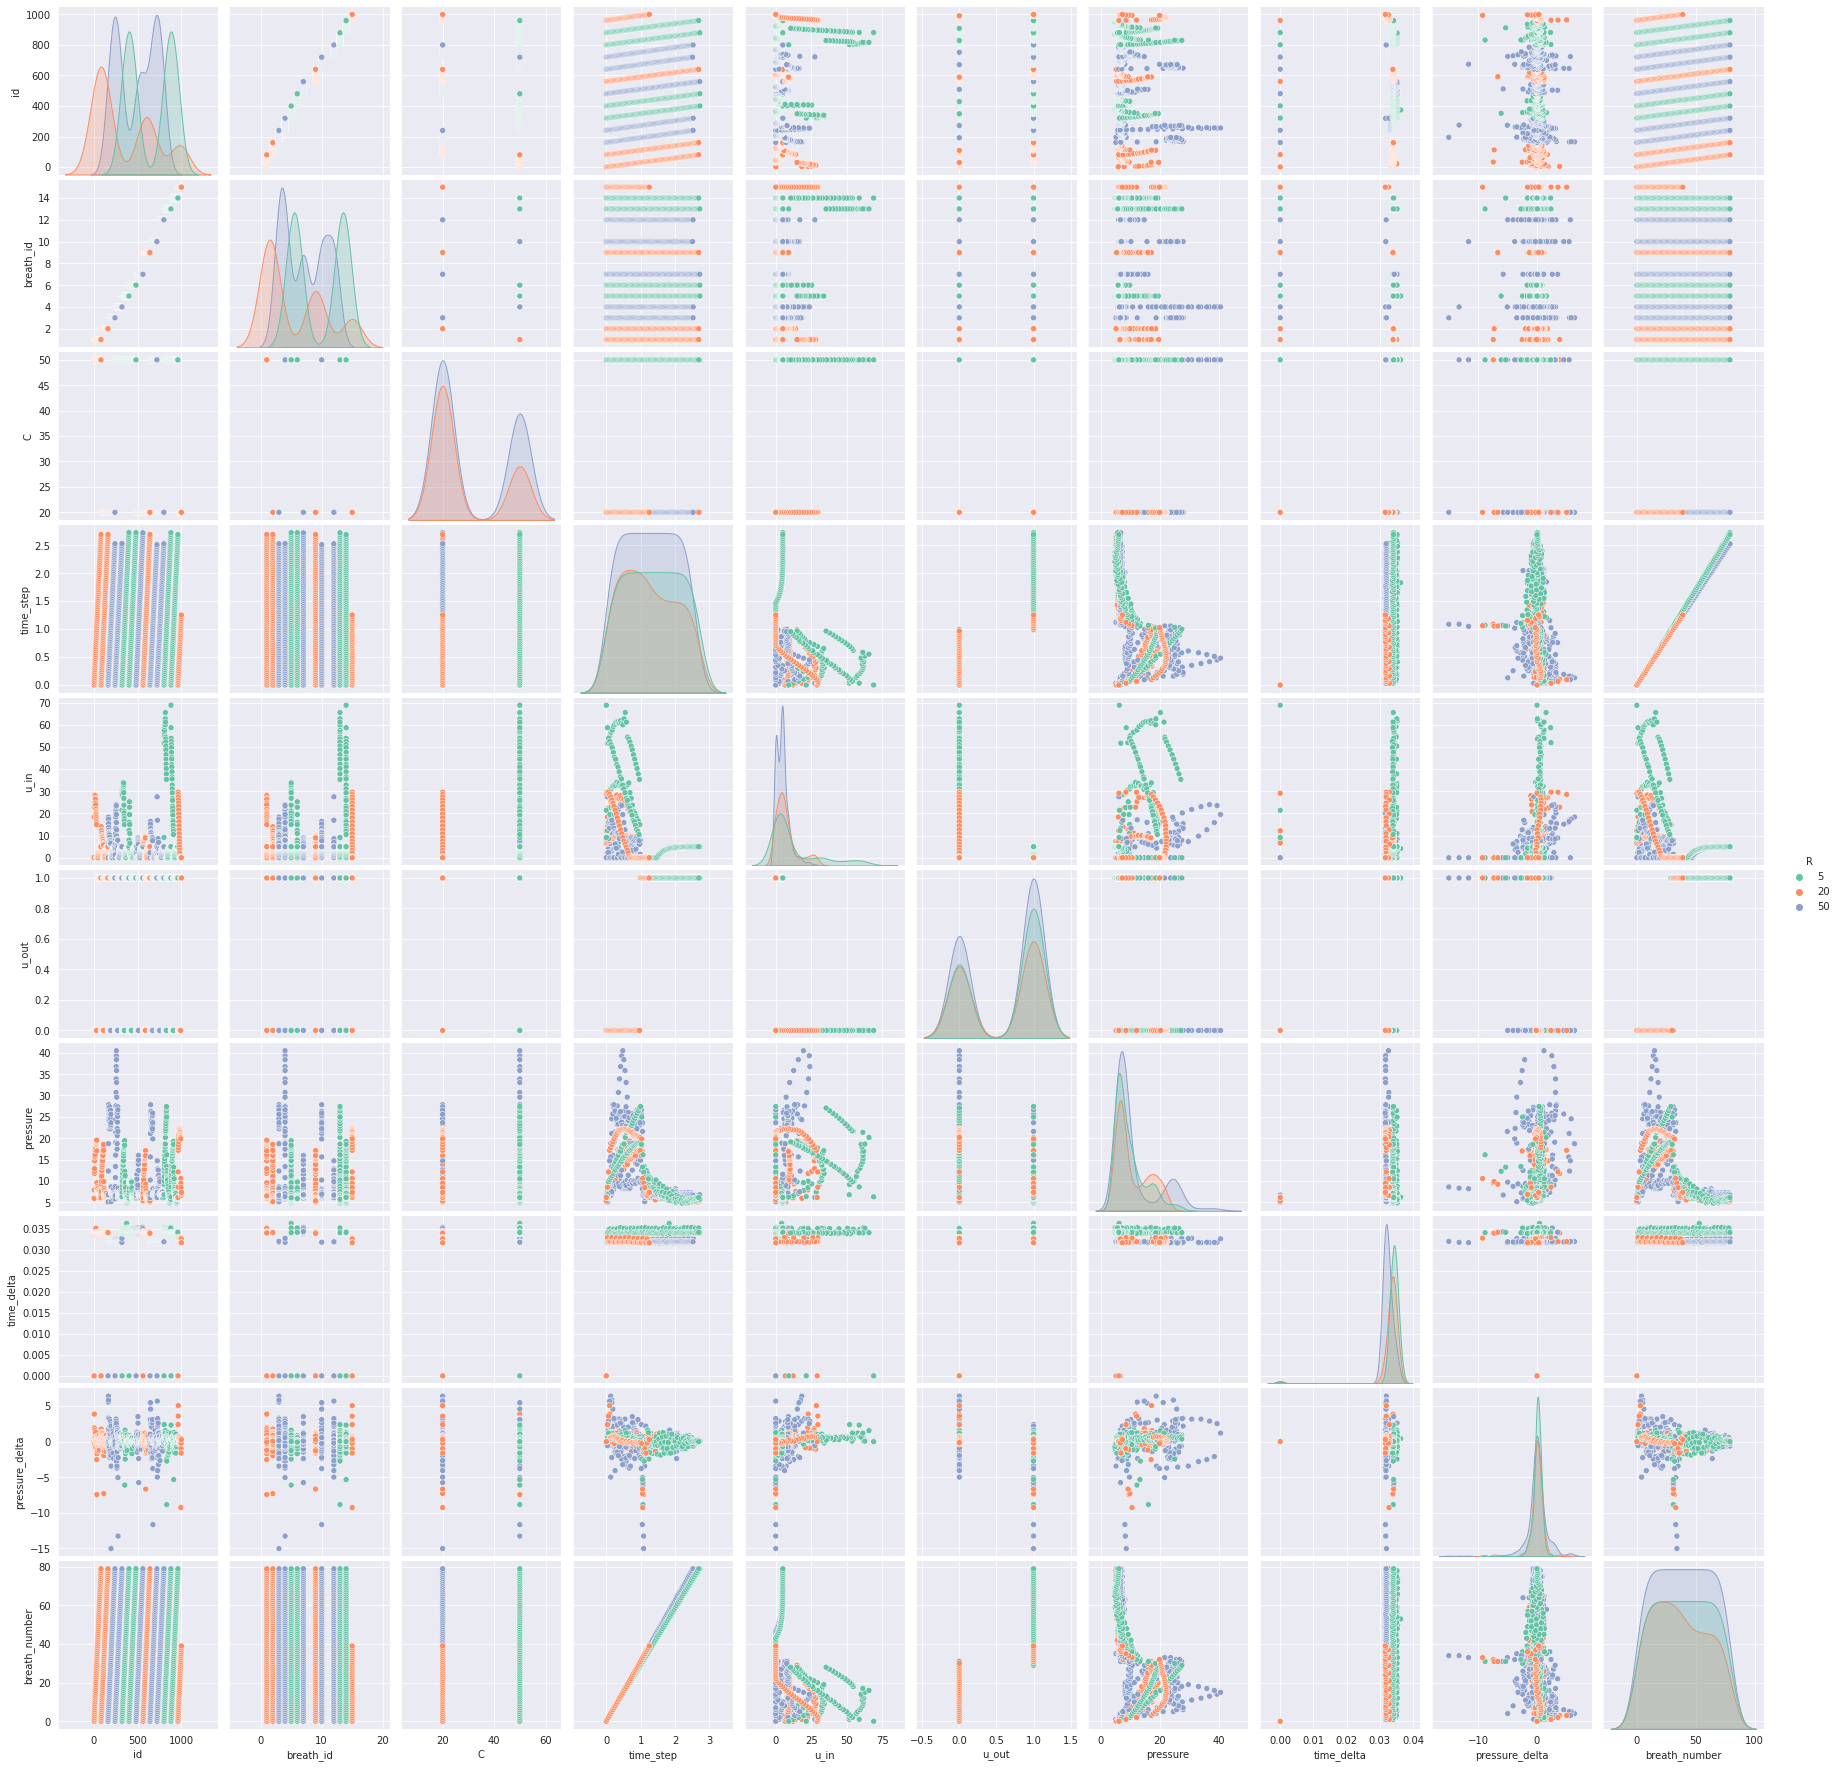

In [89]:
graph_R = sns.pairplot(train_updated.head(1000), hue="R", palette="Set2", diag_kind="kde", height=2.5)

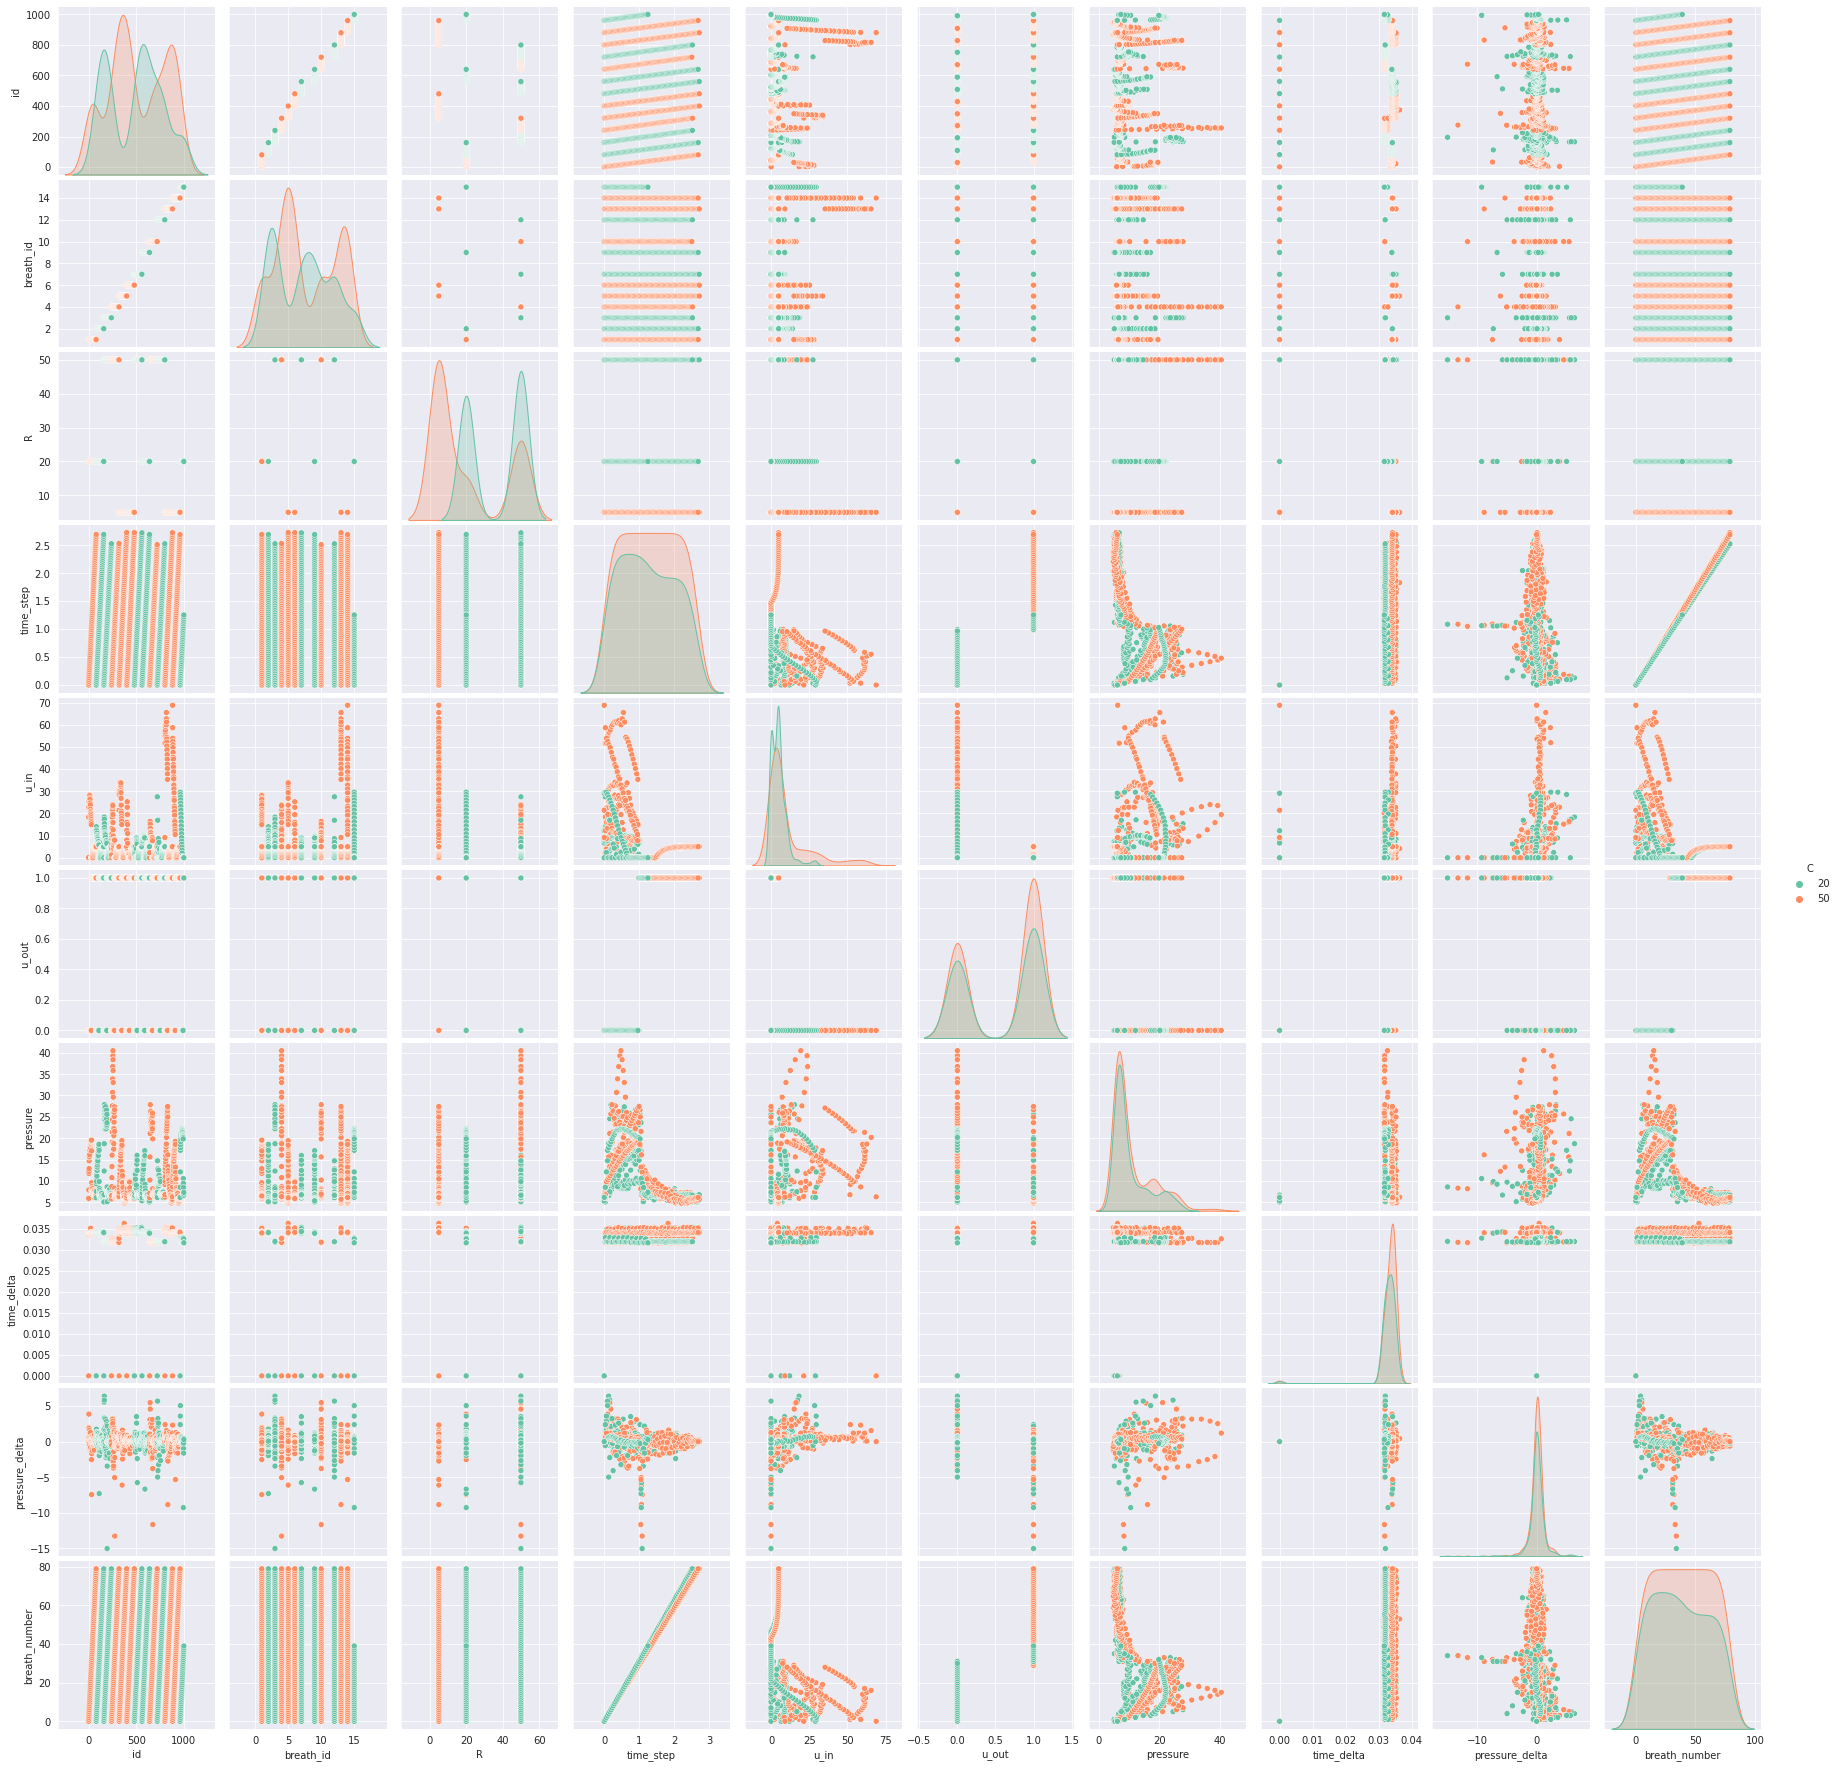

In [90]:
graph_C = sns.pairplot(train_updated.head(1000), hue="C", palette="Set2", diag_kind="kde", height=2.5)

In [91]:
train_updated.columns

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure',
       'time_delta', 'pressure_delta', 'breath_number'],
      dtype='object')

In [92]:
test_updated.columns

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'time_delta',
       'breath_number'],
      dtype='object')

In [93]:
#Realized that we don't have the pressure_delta in the test dataframe so we will not be able to test/predict... so dropping this column from train dataframe as well...
train_columns=['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'time_delta', 'breath_number','pressure']
test_columns=['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'time_delta','breath_number']

In [96]:
#Re-arrangint the columns for tain and test data to have similar order (with Pressure being an extra === target column in the train dataframe)

train_updated = train_updated.reindex(columns=train_columns)
test_updated = test_updated.reindex(columns=test_columns)

In [98]:
#Saving the feature engineered data to drive
train_updated.to_csv('/content/drive/MyDrive/Kaggle_Google_Brain/Data/train_updated.csv', index=False)
test_updated.to_csv('/content/drive/MyDrive/Kaggle_Google_Brain/Data/test_updated.csv', index=False)